In [1]:
import sqlite3 
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
dbname='hyundaiStock.db'
def selData(whr='where SIDX=0'):
    with sqlite3.connect(dbname) as conn:
        cur=conn.cursor()
        sql='select SDAY, OPENP, HIGHP,LOWP, CLOSEP, VOL from StockDay '+whr
        cur.execute(sql)
        rows=cur.fetchall()
        cur.close()
    return rows

### GS

In [5]:
whr='where SDAY>20191201 and SCODE="028150" order by SDAY  asc limit 250'
res=selData(whr)
cols=['SDAY','OPENP','HIGHP','LOWP','CLOSEP','VOL']
dfgs=pd.DataFrame(data=res,columns=cols)
dfgs.head()

,SDAY,OPENP,HIGHP,LOWP,CLOSEP,VOL
0,20191202,150700,150800,149000,150000,6603
1,20191203,150000,150000,146800,148200,7967
2,20191204,146500,146500,145800,146000,8597
3,20191205,146100,147300,145800,145800,11729
4,20191206,145800,147800,145600,147800,7635


### CJ

In [6]:
whr='where SDAY>20191201 and SCODE="035760" order by SDAY  asc limit 250'
res=selData(whr)
cols=['SDAY','OPENP','HIGHP','LOWP','CLOSEP','VOL']
df=pd.DataFrame(data=res,columns=cols)
df.head()

,SDAY,OPENP,HIGHP,LOWP,CLOSEP,VOL
0,20191202,153000,155300,152600,153800,46450
1,20191203,153100,155400,151400,154500,53094
2,20191204,151500,154700,151500,153800,38623
3,20191205,154300,155700,153800,154500,60945
4,20191206,154500,154500,151500,151900,70037


### 경쟁사 분석
* 동종 유사 주가의 경쟁사 분석을 통해 시장기준 주가 분석

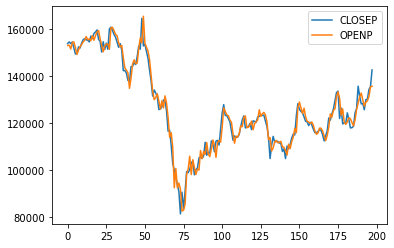

In [7]:
sels=['CLOSEP','OPENP']
df[sels].plot()
#plt.xlim(50,75)
#plt.ylim(50000,70000)
plt.show()

# 이동평균선
* 주가 기술분석

In [8]:
def makeMV(baseday=5,basedata=df['CLOSEP']):
    res=[]
    # 초기화 하기
    for i in range(baseday-1):
        res.append(0)
    # 이동평균 데이터 만들기
    n=len(basedata)-(baseday-1)
    print("총 데이터수:",len(basedata),"초기화 안되고 채워야할 부분:",n)
    for i in range(n):
        mvdata=np.average(basedata[i:i+baseday])
        res.append(mvdata)
    return res


In [9]:
df['MV5']=makeMV(5)
df['MV30']=makeMV(30)
df['gsClose']=dfgs['CLOSEP']
df.head()

총 데이터수: 198 초기화 안되고 채워야할 부분: 194
총 데이터수: 198 초기화 안되고 채워야할 부분: 169


,SDAY,OPENP,HIGHP,LOWP,CLOSEP,VOL,MV5,MV30,gsClose
0,20191202,153000,155300,152600,153800,46450,0.0,0.0,150000
1,20191203,153100,155400,151400,154500,53094,0.0,0.0,148200
2,20191204,151500,154700,151500,153800,38623,0.0,0.0,146000
3,20191205,154300,155700,153800,154500,60945,0.0,0.0,145800
4,20191206,154500,154500,151500,151900,70037,153700.0,0.0,147800


### CJ vs GS

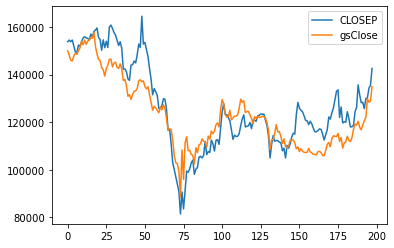

In [10]:
df[['CLOSEP','gsClose']].plot()
#plt.xlim(0,10)
#plt.ylim(150000,170000)
plt.legend()
plt.show()